Bộ dữ liệu TehranHouse.csv chứa các thông tin về bất động sản ở Tehran, gồm các thuộc tính như:

* Area (diện tích): Loại dữ liệu chuỗi, mô tả khu vực hoặc địa chỉ của căn nhà.
* Room (số phòng): Số nguyên, số phòng trong căn nhà.
* Parking: Dữ liệu dạng boolean (True/False), thể hiện nhà có chỗ đỗ xe hay không.
* Warehouse: Dữ liệu dạng boolean, chỉ định nhà có nhà kho hay không.
* Elevator: Dữ liệu dạng boolean, chỉ định nhà có thang máy hay không.
* Address: Loại dữ liệu chuỗi, địa chỉ chi tiết của căn nhà.
* Price: Giá của căn nhà, kiểu dữ liệu số thực (float64).
* Price(USD): Giá của căn nhà quy đổi ra USD, cũng là kiểu dữ liệu số thực.


Mục tiêu của bài toán là xây dựng một mô hình học máy để dự đoán giá nhà dựa trên các thuộc tính có sẵn trong bộ dữ liệu.



Mô tả bài toán và mục tiêu
Bài toán này là bài toán hồi quy sử dụng mô hình rừng ngẫu nhiên (Random Forest) trong thư viện tensorflow_decision_forests. Mục tiêu là huấn luyện mô hình với dữ liệu huấn luyện và đánh giá mô hình với dữ liệu kiểm thử để dự đoán chính xác giá nhà (biến mục tiêu).

**Cài đặt thư viện TensorFlow Decision Forests**

In [1]:
pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 812.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installat

In [2]:
pip install wurlitzer

Đây là các lệnh cài đặt tensorflow_decision_forests để sử dụng mô hình rừng quyết định trong TensorFlow và wurlitzer để hỗ trợ hiển thị đầu ra.

**Import thư viện**

In [3]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

Cấu hình môi trường và import các thư viện cần thiết như TensorFlow, Pandas, NumPy.

**Kiểm tra phiên bản Decision Forest**

In [5]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/content/TehranHouse.csv")

# Display the first 3 examples.
dataset_df.head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33


Bộ dữ liệu được tải về và đọc vào DataFrame của Pandas. Đoạn code có thể tải nhầm dữ liệu không liên quan (penguins), cần chú ý đường dẫn chính xác.

In [6]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "Price"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: [1850000000.0, 550000000.0, 902500000.0, 7000000000.0, 2050000000.0, 600000000.0, 2150000000.0, 493000000.0, 2370000000.0, 2450000000.0, 2100000000.0, 1690000000.0, 11000000000.0, 5000000000.0, 570000000.0, 6700000000.0, 1450000000.0, 6400000000.0, 1390000000.0, 2500000000.0, 1880000000.0, 2277000000.0, 7150000000.0, 14945000000.0, 1771000000.0, 4059000000.0, 630000000.0, 3200000000.0, 1500000000.0, 2200000000.0, 7872000000.0, 2350000000.0, 3750000000.0, 5250000000.0, 4830000000.0, 3400000000.0, 3850000000.0, 1200000000.0, 2650000000.0, 4750000000.0, 2980000000.0, 2035000000.0, 2460000000.0, 540000000.0, 10000000000.0, 635000000.0, 2030000000.0, 3000000000.0, 7200000000.0, 1750000000.0, 3300000000.0, 2800000000.0, 3500000000.0, 3100000000.0, 1920000000.0, 850000000.0, 1650000000.0, 1700000000.0, 560000000.0, 5500000000.0, 10200000000.0, 1760000000.0, 3730000000.0, 620000000.0, 580000000.0, 3050000000.0, 2000000000.0, 2600000000.0, 5990000000.0, 2300000000.0, 1300000000.0

Mã hóa cột Price để biến nó thành dạng số nguyên phù hợp cho việc huấn luyện mô hình.

Chia tập dữ liệu để huấn luyện và kiểm tra

In [7]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

2439 examples in training, 1040 examples for testing.


Hàm split_dataset chia dữ liệu thành 70% huấn luyện và 30% kiểm thử.

In [18]:
train_ds_pd['Warehouse'] = train_ds_pd['Warehouse'].astype(int)
train_ds_pd['Elevator'] = train_ds_pd['Elevator'].astype(int)

<ipython-input-18-e56e49e05bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd['Warehouse'] = train_ds_pd['Warehouse'].astype(int)
<ipython-input-18-e56e49e05bb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd['Elevator'] = train_ds_pd['Elevator'].astype(int)


chuyển đổi khung dữ liệu gấu trúc thành bộ dữ liệu

Chuyển đổi các cột Warehouse và Elevator sang kiểu int để đảm bảo tính nhất quán.

In [19]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, max_num_classes=800)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label, max_num_classes=800)

Hàm pd_dataframe_to_tf_dataset sẽ tự động chuyển đổi các nhãn dạng chuỗi thành số nguyên nếu cần.

In [20]:
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpawsdo21k as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Area': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'Room': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Parking': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'Warehouse': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Elevator': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'Address': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'Price(USD)': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Area': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'Room': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Parking': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=

I0000 00:00:1731544098.234226     874 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1731544098.234298     874 kernel.cc:783] Collect training examples
I0000 00:00:1731544098.234315     874 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1731544098.234981     874 kernel.cc:401] Number of batches: 3
I0000 00:00:1731544098.235024     874 kernel.cc:402] Number of examples: 2439
I0000 00:00:1731544098.235817     874 data_spec_inference.cc:354] 96 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Address (82 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:17315

Model trained in 0:29:29.207921
Compiling model...
Model compiled.


Khởi tạo mô hình RandomForestModel và huấn luyện với dữ liệu.

In [54]:

train_ds_pd['Parking'] = train_ds_pd['Parking'].astype(int)
train_ds_pd['Warehouse'] = train_ds_pd['Warehouse'].astype(int)
train_ds_pd['Elevator'] = train_ds_pd['Elevator'].astype(int)

<ipython-input-54-8ad0341c8759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd['Parking'] = train_ds_pd['Parking'].astype(int)
<ipython-input-54-8ad0341c8759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd['Warehouse'] = train_ds_pd['Warehouse'].astype(int)
<ipython-input-54-8ad0341c8759>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [31]:
model_1.compile(metrics=["Warehouse"])

Biên dịch mô hình và đổi tên các cột dữ liệu để nhất quán.

In [29]:
print(train_ds_pd.dtypes)

Area           object
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address        object
Price           int64
Price(USD)    float64
dtype: object


**Chuẩn bị mô hình phục vụ TensorFlow**: Xuất mô hình sang định dạng SavingModel để sử dụng lại sau này

In [35]:
# Đổi tên cột
train_ds_pd.rename(columns={'Price(USD)': 'Price_USD'}, inplace=True)
test_ds_pd.rename(columns={'Price(USD)': 'Price_USD'}, inplace=True)

<ipython-input-35-c2caab7929e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds_pd.rename(columns={'Price(USD)': 'Price_USD'}, inplace=True)
<ipython-input-35-c2caab7929e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ds_pd.rename(columns={'Price(USD)': 'Price_USD'}, inplace=True)


Vẽ model

In [42]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

 sử dụng để hiển thị hình ảnh trực quan của một cây quyết định từ mô hình RandomForestModel

In [43]:
model_1.summary()

Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	Address
	Area
	Elevator
	Parking
	Price(USD)
	Room
	Warehouse

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Price(USD)"  0.762570 ################
    2.    "Address"  0.225006 ##
    3.       "Area"  0.173039 #
    4.       "Room"  0.130553 
    5.   "Elevator"  0.106217 
    6.  "Warehouse"  0.104966 
    7.    "Parking"  0.104893 

Variable Importance: NUM_AS_ROOT:
    1. "Price(USD)" 11.000000 ################
    2.    "Address"  3.000000 

Variable Importance: NUM_NODES:
    1. "Price(USD)" 2594.000000 ################
    2.       "Area" 1214.000000 #######
    3.

In [44]:
# The input features
model_1.make_inspector().features()

["Address" (4; #0),
 "Area" (4; #1),
 "Elevator" (1; #2),
 "Parking" (1; #3),
 "Price(USD)" (1; #4),
 "Room" (1; #5),
 "Warehouse" (1; #6)]

In [45]:
# The feature importances
model_1.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("Price(USD)" (1; #4), 0.7625701428347144),
  ("Address" (4; #0), 0.2250058043577017),
  ("Area" (4; #1), 0.17303936163593578),
  ("Room" (1; #5), 0.13055296177750236),
  ("Elevator" (1; #2), 0.10621691025689535),
  ("Warehouse" (1; #6), 0.10496583519202395),
  ("Parking" (1; #3), 0.10489260981816843)],
 'NUM_AS_ROOT': [("Price(USD)" (1; #4), 11.0), ("Address" (4; #0), 3.0)],
 'SUM_SCORE': [("Price(USD)" (1; #4), 125856.60957339406),
  ("Area" (4; #1), 23695.929291918874),
  ("Address" (4; #0), 22240.470229756087),
  ("Room" (1; #5), 4228.887811124325),
  ("Elevator" (1; #2), 605.0259734690189),
  ("Warehouse" (1; #6), 322.29377394914627),
  ("Parking" (1; #3), 307.2153676301241)],
 'NUM_NODES': [("Price(USD)" (1; #4), 2594.0),
  ("Area" (4; #1), 1214.0),
  ("Address" (4; #0), 866.0),
  ("Room" (1; #5), 50.0),
  ("Elevator" (1; #2), 39.0),
  ("Parking" (1; #3), 27.0),
  ("Warehouse" (1; #6), 18.0)]}

sử dụng để truy xuất độ quan trọng của các biến (feature importances) trong mô hình RandomForestModel

In [46]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=2435, accuracy=0.34743326488706366, loss=17.647825250464052, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

model_1.make_inspector().evaluation() được sử dụng để đánh giá mô hình RandomForestModel đã được huấn luyện trên tập dữ liệu

Sơ đồ training

In [47]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=896, accuracy=0.24665178571428573, loss=27.153420554740087, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=3, evaluation=Evaluation(num_examples=1812, accuracy=0.28642384105960267, loss=24.10316204274727, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=6, evaluation=Evaluation(num_examples=2271, accuracy=0.30823425803610743, loss=21.595334421546383, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=8, evaluation=Evaluation(num_examples=2378, accuracy=0.3128679562657696, loss=20.45318857545332, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=2426, accuracy=0.34130255564715584, loss=18.41612076412914, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=13, evaluation=Evaluation(num_examples=2435, accuracy=0.34743326488706366, loss=17.647825250464052, rmse

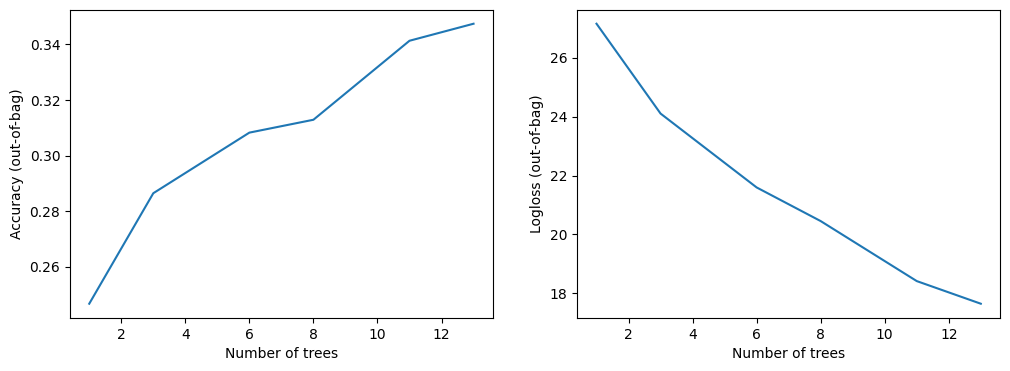

In [48]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

Vẽ biểu đồ để trực quan hóa quá trình huấn luyện, bao gồm độ chính xác và độ mất mát theo số lượng cây trong rừng.